# DZ-2010-DBMML

Replicating Dowe & Nayyar 2010 *"Database Normalisation as a By-Product of Minimum Message Length Inferencing"*

In [1]:
from mml import *
import pandas as pd

In [2]:
# Stud-ID, Stud-Name, Stud-Address, Stud-Course, Unit-No, Unit-Name, Lect-No, Lect-Name, Yr-Sem, Grade

## Table 8 replication

$L = 11$ in 1NF, shown in Table 8

In [3]:
t8_results = pd.DataFrame(
    [test_1nf(), test_2nf(), test_3nf()],
    columns=["name", "attr", "tables", "1P", "2P", "ML"],
)
t8_results.style.set_caption('Recreation of Table 8')
t8_results[["name", "1P", "2P", "ML"]].to_csv('output/table8.csv')
t8_results[["name", "1P", "2P", "ML"]]

,name,1P,2P,ML
0,DZ-1NF,10.228819,203.034011,213.262830
1,DZ-2NF,36.471091,154.848946,191.320037
2,DZ-3NF,46.284872,153.848946,200.133818


## Table 9 replication

In [4]:
attributes = [100, 100, 100, 100, 30, 30, 15, 15, 3, 3]
L = 300
t9_results = pd.DataFrame(
    [
        test_1nf(attributes, L),
        test_2nf(attributes, L),
        test_3nf(attributes, L),
    ],
    columns=["name", "attr", "tables", "1P", "2P", "ML"],
)
t9_results.style.set_caption("Recreation of Table 9")
t9_results[["name", "1P", "2P", "ML"]].to_csv("output/table9.csv")
t9_results[["name", "1P", "2P", "ML"]]


,name,1P,2P,ML
0,DZ-1NF,10.228819,14211.873643,14222.102462
1,DZ-2NF,36.471091,8149.535567,8186.006658
2,DZ-3NF,46.284872,7876.053225,7922.338097


## Figure 1 replication

The figures describe how "premature" normalisation can be seen as not ideal from the MML perspective, as the extra information needed to encode an extra table and its attributes does not get its benefits realised if there's no redundant data to begin with.

However, this is also because our current methodology builds on the asusmption that we do not know anything about the attributes in a table, and what are its dependencies. In practice, if you anticipate a dependency such even before encountering redundant data, you would normalise it to be in its true xNF form.

In [5]:
def test_3nf_unenforced(attribute_instances, L):
    """3NF for Fig. 1a that skips the 2NF stage and avoids unnecessary normalisation"""

    tables = [
        Table(
            unique_rows=L,
            attributes=[0, 1, 2, 3, 4, 5, 6, 8, 9],
            pks=[0, 4, 8],
        ),
        # Table(
        #     unique_rows=attribute_instances[4],
        #     attributes=[4, 5],
        #     pks=[4],
        # ),
        # Table(
        #     unique_rows=L,
        #     attributes=[0, 4, 8, 9],
        #     pks=[0, 4, 8],
        # ),
        Table(unique_rows=attribute_instances[6], attributes=[6, 7], pks=[6]),
    ]
    return (
        "DZ-3NF-NE",
        attribute_instances,
        tables,
        first_part_message_length(
            total_attributes=attribute_instances.__len__(), tables=tables
        ),
        second_part_message_length(
            attribute_instances=attribute_instances, tables=tables
        ),
        total_message_length(attribute_instances=attribute_instances, tables=tables),
    )


In [6]:
# Stud-ID, Stud-Name, Stud-Address, Stud-Course, Unit-No, Unit-Name, Lect-No, Lect-Name, Yr-Sem, Grade
fig1a_results = []
# columns=["name", "attr", "tables", "1P", "2P", "ML"]
for i in range(1, 10001):
    attributes = [i, i, i, i, 30, 30, 15, 15, 3, 3]
    L = i
    fig1a_results += [[
        i,
        test_1nf(attributes, L)[-1],
        test_2nf(attributes, L)[-1],
        test_3nf(attributes, L)[-1],
        test_3nf_unenforced(attributes, L)[-1],]
    ]
fig1a_table = pd.DataFrame(fig1a_results, columns=["i", "1NF", "2NF", "3NF (enforced)", "3NF"])
# fig1a_table.style.set_caption("Recreation of Fig. 1a")
# fig1a_table[["name", "1P", "2P", "ML"]].to_csv("output/fig1a.csv")
fig1a_table.style.set_caption(caption="(1a) Total ML by m_1 (no. of students), L = m_1")

fig1a_table


,i,1NF,2NF,3NF (enforced),3NF
0,1,31.026306,346.775123,469.888732,156.947269
1,2,59.823793,372.665720,491.872438,181.837866
2,3,91.640831,402.330755,517.630582,209.748013
3,4,125.418768,434.446914,545.839850,239.619060
4,5,160.654818,468.385713,575.871759,270.948219
...,...,...,...,...,...
9995,9996,739174.725988,823264.306623,784338.048728,700251.275449
9996,9997,739254.443085,823353.846732,784423.681946,700327.085655
9997,9998,739334.160760,823443.387562,784509.315886,700402.896439
9998,9999,739413.879011,823532.929114,784594.950547,700478.707799


<AxesSubplot: title={'center': '(1a) Total MML by m_1 (no. of students), L = m_1'}, xlabel='m_1, number of students', ylabel='Encoded message length'>

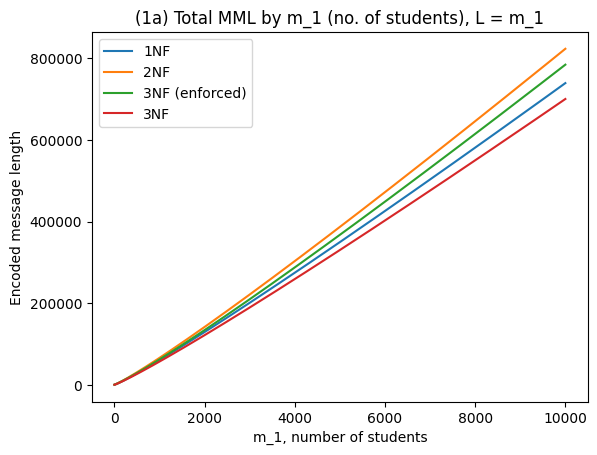

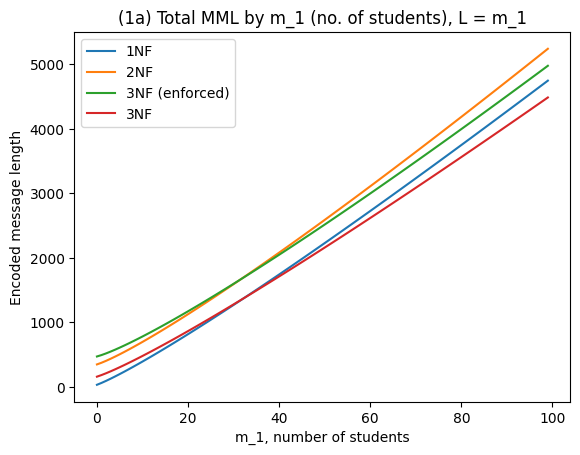

In [7]:
a_plot = fig1a_table[["1NF", "2NF", "3NF (enforced)", "3NF"]].plot()
a_plot.set_title(label="(1a) Total MML by m_1 (no. of students), L = m_1")
a_plot.set_xlabel(xlabel="m_1, number of students")
a_plot.set_ylabel(ylabel="Encoded message length")
a_plot

a_plot_log = fig1a_table[["1NF", "2NF", "3NF (enforced)", "3NF"]][:100].plot()
a_plot_log.set_title(label="(1a) Total MML by m_1 (no. of students), L = m_1")
a_plot_log.set_xlabel(xlabel="m_1, number of students")
a_plot_log.set_ylabel(ylabel="Encoded message length")
# a_plot_log.set_yscale('log')
# a_plot_log.set_xscale('log')
a_plot_log

<AxesSubplot: title={'center': '(1a) Total MML by m_1 (no. of students), L = m_1'}, xlabel='m_1, number of students', ylabel='Encoded message length'>

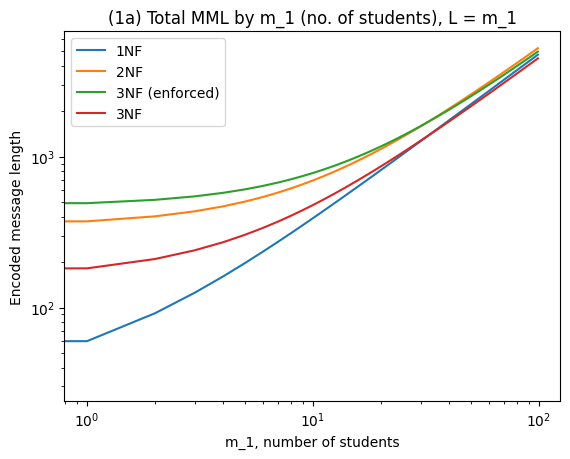

In [8]:
# Stud-ID, Stud-Name, Stud-Address, Stud-Course, Unit-No, Unit-Name, Lect-No, Lect-Name, Yr-Sem, Grade
# pk Stud-ID, Unit-No, Yr-Sem

# Stud-ID -> {Stud-Name, Stud-Address, Stud-Course, Lect-No}  (2NF, 3NF)
# Unit-No -> Unit-Name (2NF, 3NF)
# Lect-No -> Lect-Name (3NF)
# {Stud-ID, Unit-No, Yr-Sem} -> Grade  (2NF, 3NF)
# 
# Multi-Valued Dependencies
# Stud-ID ->> Unit-Name (Both are superkeys)

# Potential Dependencies
# Stud-ID ->> Lect-No
# {Stud-ID, Unit-No, Lect-No} ->> 
# 

a_plot_log = fig1a_table[["1NF", "2NF", "3NF (enforced)", "3NF"]][:100].plot()
a_plot_log.set_title(label="(1a) Total MML by m_1 (no. of students), L = m_1")
a_plot_log.set_xlabel(xlabel="m_1, number of students")
a_plot_log.set_ylabel(ylabel="Encoded message length")
a_plot_log.set_yscale('log')
a_plot_log.set_xscale('log')
a_plot_log

In [9]:
# Stud-ID, Stud-Name, Stud-Address, Stud-Course, Unit-No, Unit-Name, Lect-No, Lect-Name, Yr-Sem, Grade
fig1b_results = []
# columns=["name", "attr", "tables", "1P", "2P", "ML"]
for i in range(1, 10001):
    attributes = [i, i, i, i, 30, 30, 15, 15, 3, 3]
    L = i * 3
    fig1b_results += [[
        i,
        test_1nf(attributes, L)[-1],
        test_2nf(attributes, L)[-1],
        test_3nf(attributes, L)[-1],
        test_3nf_unenforced(attributes, L)[-1],]
    ]
fig1b_table = pd.DataFrame(fig1b_results, columns=["i", "1NF", "2NF", "3NF (enforced)", "3NF"])
fig1b_table.style.set_caption("Recreation of Fig. 1b")
# fig1a_table[["name", "1P", "2P", "ML"]].to_csv("output/fig1a.csv")
fig1b_table

,i,1NF,2NF,3NF (enforced),3NF
0,1,7.262128e+01,3.629288e+02,4.860424e+02,1.907285e+02
1,2,1.590137e+02,4.089730e+02,5.281797e+02,2.654003e+02
2,3,2.544649e+02,4.603014e+02,5.756013e+02,3.491307e+02
3,4,3.557987e+02,5.150614e+02,6.264544e+02,4.387438e+02
4,5,4.615068e+02,5.723731e+02,6.798592e+02,5.327313e+02
...,...,...,...,...,...
9995,9996,2.217504e+06,1.250372e+06,1.211446e+06,2.100474e+06
9996,9997,2.217743e+06,1.250508e+06,1.211577e+06,2.100701e+06
9997,9998,2.217982e+06,1.250643e+06,1.211709e+06,2.100929e+06
9998,9999,2.218221e+06,1.250778e+06,1.211840e+06,2.101156e+06


<AxesSubplot: title={'center': '(1b) Total MML by m_1 (no. of students), L = 3 * m_1'}, xlabel='m_1, number of students', ylabel='Encoded message length'>

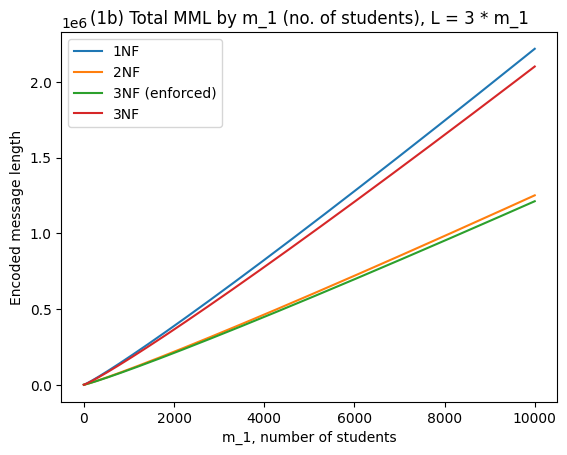

In [10]:
b_plot = fig1b_table[["1NF", "2NF", "3NF (enforced)", "3NF"]].plot()
b_plot.set_title(label="(1b) Total MML by m_1 (no. of students), L = 3 * m_1")
b_plot.set_xlabel(xlabel="m_1, number of students")
b_plot.set_ylabel(ylabel="Encoded message length")
b_plot

<AxesSubplot: title={'center': '(1b) Total MML by m_1 (no. of students), L = 3 * m_1'}, xlabel='m_1, number of students', ylabel='Encoded message length'>

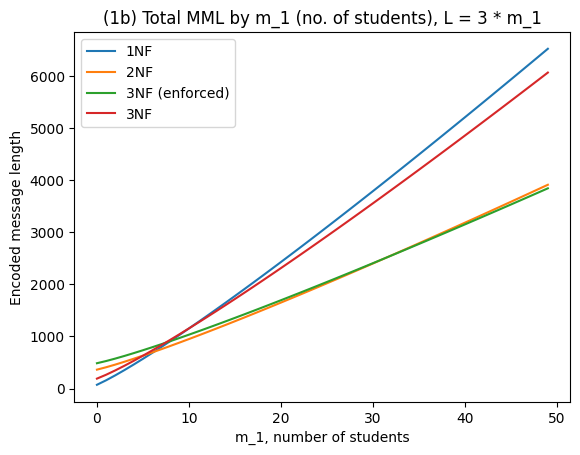

In [11]:
b_plot_log = fig1b_table[["1NF", "2NF", "3NF (enforced)", "3NF"]][:50].plot()
b_plot_log.set_title(label="(1b) Total MML by m_1 (no. of students), L = 3 * m_1")
b_plot_log.set_xlabel(xlabel="m_1, number of students")
b_plot_log.set_ylabel(ylabel="Encoded message length")
# b_plot_log.set_yscale('log')
# b_plot_log.set_xscale('log')
b_plot_log

## Higher NF figures

Previously used dependencies up to 3NF
```
Stud-ID, Stud-Name, Stud-Address, Stud-Course, Unit-No, Unit-Name, Lect-No, Lect-Name, Yr-Sem, Grade
pk Stud-ID, Unit-No, Yr-Sem

Stud-ID -> {Stud-Name, Stud-Address, Stud-Course, Lect-No}
Unit-No -> Unit-Name
Lect-No -> Lect-Name
{Stud-ID, Unit-No, Yr-Sem} -> Grade
```

Potential dependencies for Higher NF analysis

Multi-Valued Dependencies
```
Stud-ID ->> Unit-Name (Both are superkeys, is BCNF)
```

Potential Dependencies
```
Stud-ID ->> Lect-No
{Stud-ID, Unit-No, Lect-No} ->>
```


The following tables are used for analysis of higher normal forms

3NF

Base table
(**`yr-sem`**, **`subject`**, **`textbooks`**)

4NF

Assume that `yr-sem` and
`textbooks` are independent, that is, there is no `yr-sem ->> textbooks`.
and we know `yr-sem` is not a superkey from observing the 3NF table.

(**`subject`**, **`yr-sem`**)
(**`subject`**, **`textbooks`**)

5NF 

Assume that `yr-sem ->> textbooks`

(**`subject`**, **`yr-sem`**)
(**`subject`**, **`textbooks`**)
(**`yr-sem`**, **`textbooks`**)

### 4NF

In [12]:
from hnfmml import *

In [13]:
# def ct_gen(i: int) -> list[list[int]]:
#     import random
#     random.seed(0)

#     table = []
#     units = [x for x in range(i)]
#     for i in range(10):
#         random.shuffle(units)
#         for j in units[:random.randrange(len(units) // 2, len(units))]:
#             for k in range(3, 3 + j + 1):
#                 table += [[i, j, j * 6 + k]]
#     return table

In [14]:
# t2 = ct_gen(5)
# print(len(t2))
# print(count_unique_rows(t2, [0, 1, 2]))
# print(count_unique_rows(t2, [0, 1]))
# print(count_unique_rows(t2, [1, 2]))
# print(count_unique_rows(t2, [0, 2]))
# t2

In [15]:
# # (**yr-sem**, **course**, **textbooks**)
# fig2_results = []
# # columns=["name", "attr", "tables", "1P", "2P", "ML"]
# for i in range(1, 10001):
#     table = ct_gen(i)
#     attributes = [count_unique_rows(table, [0]), count_unique_rows(table, [1]), count_unique_rows(table, [2])]
#     L = i * 3
#     fig1b_results += [
#         i,
#         ct_3nf(attributes, len(table)),
#         ct_4nf(attributes, table)
#     ]
# fig1b_table = pd.DataFrame(fig1b_results, columns=["i", "ct-3nf", "ct-4nf"])
# fig1b_table.style.set_caption("fig 2b with 4nf")
# # fig1a_table[["name", "1P", "2P", "ML"]].to_csv("output/fig1a.csv")
# fig1b_table

#### Generate

In [16]:
# (**`yr-sem`**, **`subject`**, **`textbooks`**)
hnf_4a = []
temp_table = []
# columns=["name", "attr", "tables", "1P", "2P", "ML"]
for i in range(1, 2001, 1):
    L = i
    temp_table += [[i, 0, i]]
    attributes = count_unique_attribute_instances(temp_table)
    hnf_4a += [[i, ct_3nf(attributes, temp_table)[-1], ct_4nf(attributes, temp_table)[-1], ct_5nf(attributes, temp_table)[-1]]]
    # print(ct_4nf(attributes, temp_table))

hnf_4a_table = pd.DataFrame(hnf_4a, columns=["i", "3NF", "4NF", "5NF"])

hnf_4a_table


,i,3NF,4NF,5NF
0,1,1.584963,6.339850,9.509775
1,2,5.584963,10.339850,15.509775
2,3,11.094738,15.849625,23.774438
3,4,17.584963,22.339850,33.509775
4,5,24.804243,29.559131,44.338696
...,...,...,...,...
1995,1996,43765.465816,43770.220703,65655.331055
1996,1997,43790.277721,43795.032608,65692.548912
1997,1998,43815.091070,43819.845958,65729.768937
1998,1999,43839.905864,43844.660751,65766.991127


Text(0, 0.5, 'Encoded message length')

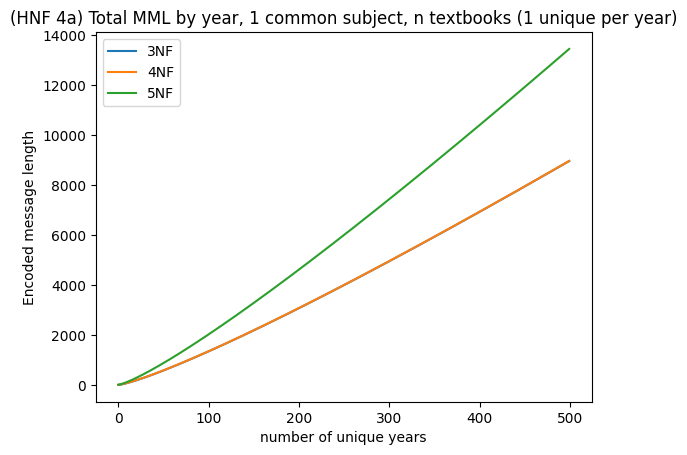

In [36]:
hnf_4a_plotA = hnf_4a_table[["3NF", "4NF", "5NF"]][:500].plot()
hnf_4a_plotA.set_title(label="(HNF 4a) Total MML by year, 1 common subject, n textbooks (1 unique per year)")
hnf_4a_plotA.set_xlabel(xlabel="number of unique years")
hnf_4a_plotA.set_ylabel(ylabel="Encoded message length")
# b_plot_log.set_yscale('log')
# b_plot_log.set_xscale('log')

In [24]:
# (**`yr-sem`**, **`subject`**, **`textbooks`**)
hnf_4b = []
temp_table = []
# columns=["name", "attr", "tables", "1P", "2P", "ML"]
for i in range(1, 301, 1):
    temp_table += [[i, 0, i] ,[i, 1, i], [i, 2, i+3000]]
    attributes = count_unique_attribute_instances(temp_table)
    hnf_4b += [[i, ct_3nf(attributes, temp_table)[-1], ct_4nf(attributes, temp_table)[-1], ct_5nf(attributes, temp_table)[-1]]]
    # print(ct_4nf(attributes, temp_table))

hnf_4b_table = pd.DataFrame(hnf_4b, columns=["i", "3NF", "4NF", "5NF"])

hnf_4b_table

,i,3NF,4NF,5NF
0,1,9.339850,18.849625,29.774438
1,2,29.094738,43.359400,68.039100
2,3,53.378950,72.398500,113.097750
3,4,80.604513,104.378950,162.568425
4,5,110.017243,138.546568,215.319852
...,...,...,...,...
295,296,16877.020840,18289.222429,27877.833643
296,297,16942.703224,18359.659700,27984.989549
297,298,17008.414753,18430.126116,28092.189174
298,299,17074.155329,18500.621580,28199.432370


Text(0, 0.5, 'Encoded message length')

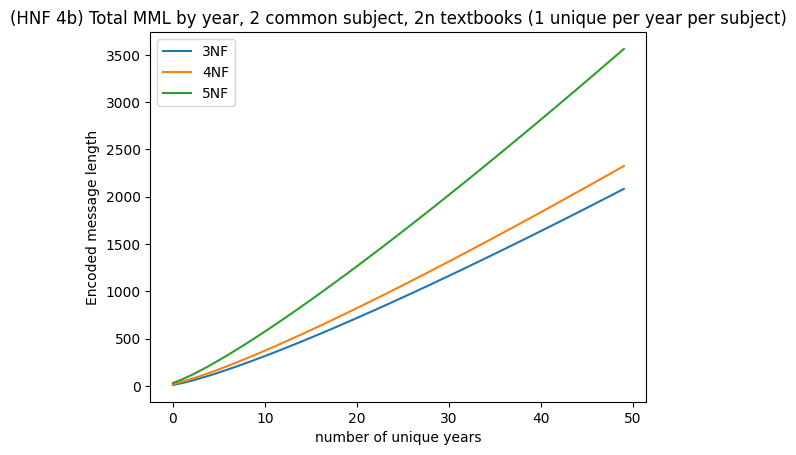

In [25]:
hnf_4b_plotA = hnf_4b_table[["3NF", "4NF", "5NF"]][:50].plot()
hnf_4b_plotA.set_title(label="(HNF 4b) Total MML by year, 2 common subject, 2n textbooks (1 unique per year per subject)")
hnf_4b_plotA.set_xlabel(xlabel="number of unique years")
hnf_4b_plotA.set_ylabel(ylabel="Encoded message length")
# b_plot_log.set_yscale('log')
# b_plot_log.set_xscale('log')

In [26]:
# (**`yr-sem`**, **`subject`**, **`textbooks`**)
hnf_4c = []
temp_table = []
# columns=["name", "attr", "tables", "1P", "2P", "ML"]
for i in range(1, 101, 1):
    temp_table += [[i, 0, 0] ,[i, 1, 1], [i, 2, 2], [i, 0, 3] ,[i, 1, 4], [i, 2, 5]]
    attributes = count_unique_attribute_instances(temp_table)
    hnf_4c += [[i, ct_3nf(attributes, temp_table)[-1], ct_4nf(attributes, temp_table)[-1], ct_5nf(attributes, temp_table)[-1]]]
    # print(ct_4nf(attributes, temp_table))

hnf_4c_table = pd.DataFrame(hnf_4c, columns=["i", "3NF", "4NF", "5NF"])

hnf_4c_table

,i,3NF,4NF,5NF
0,1,26.604513,36.114288,64.303763
1,2,63.624063,46.869175,75.058650
2,3,105.172938,59.888725,88.078200
3,4,149.663163,74.378950,102.568425
4,5,196.340555,89.962759,118.152234
...,...,...,...,...
95,96,6196.400164,2384.297800,2412.487275
96,97,6269.630587,2413.158125,2441.347600
97,98,6342.950252,2442.063069,2470.252544
98,99,6416.358246,2471.012179,2499.201654


Text(0, 0.5, 'Encoded message length')

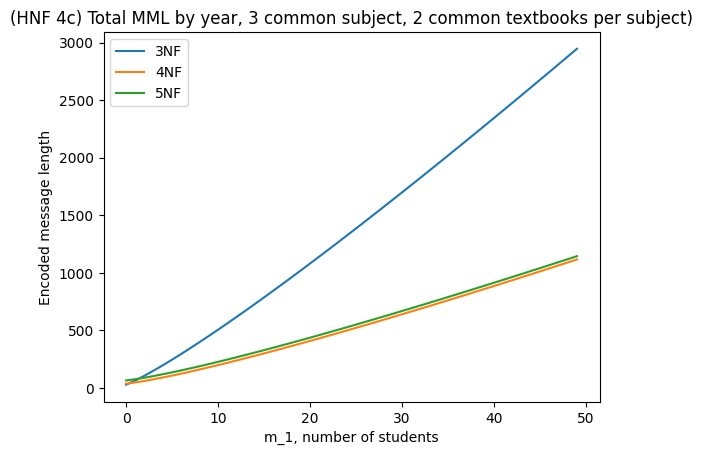

In [28]:
hnf_4c_plotA = hnf_4c_table[["3NF", "4NF", "5NF"]][:50].plot()
hnf_4c_plotA.set_title(label="(HNF 4c) Total MML by year, 3 common subject, 2 common textbooks per subject)")
hnf_4c_plotA.set_xlabel(xlabel="number of unique years")
hnf_4c_plotA.set_ylabel(ylabel="Encoded message length")
# b_plot_log.set_yscale('log')
# b_plot_log.set_xscale('log')

### 5NF

In [32]:
# import random
# random.seed(1)
# (**`yr-sem`**, **`subject`**, **`textbooks`**)
hnf_5a = []
temp_table = []
# columns=["name", "attr", "tables", "1P", "2P", "ML"]
for i in range(1, 101, 1):
    # temp_table += [[i, 0, 0] ,[i, 1, 1], [i, 2, 2], [i, 0, 3] ,[i, 1, 4], [i, 2, 5]]
    for unit in range(5):
        if i % 5 == unit:
            continue
        for book in range(3):
            if (i + unit) % 7 == book:
                continue
            temp_table += [[i, unit, book]]
    attributes = count_unique_attribute_instances(temp_table)
    hnf_5a += [[i, ct_3nf(attributes, temp_table)[-1], ct_5nf(attributes, temp_table)[-1]]]
    # print(ct_4nf(attributes, temp_table))

hnf_5a_table = pd.DataFrame(hnf_5a, columns=["i", "4NF", "5NF"])

hnf_5a_table

,i,4NF,5NF
0,1,41.019550,96.378950
1,2,109.536556,153.291918
2,3,182.816115,173.599180
3,4,261.488149,195.867342
4,5,331.712353,219.593617
...,...,...,...
95,96,10378.027675,3546.962482
96,97,10497.881597,3588.390776
97,98,10607.358206,3629.878565
98,99,10727.484628,3671.425240


Text(0, 0.5, 'Encoded message length')

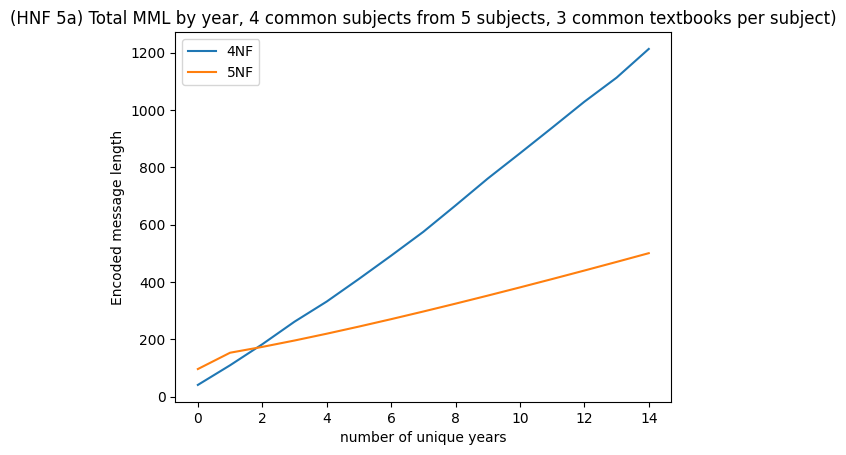

In [35]:
hnf_5a_plotA = hnf_5a_table[["4NF", "5NF"]][:15].plot()
hnf_5a_plotA.set_title(label="(HNF 5a) Total MML by year, 4 common subjects from 5 subjects, 3 common textbooks per subject)")
hnf_5a_plotA.set_xlabel(xlabel="number of unique years")
hnf_5a_plotA.set_ylabel(ylabel="Encoded message length")
# b_plot_log.set_yscale('log')
# b_plot_log.set_xscale('log')

#### Old ctgen